# Customer Analysis

In [3]:
import pandas as pd

In [4]:
import os
os.getcwd()

'C:\\Users\\Andy\\Documents\\Ironhack\\Labs\\Week1\\lab-customer-analysis-round-5'

In [5]:
marketing_customers = pd.read_csv('files_for_lab//csv_files//marketing_customer_analysis.csv')

In [6]:
marketing_customers.shape

(9134, 24)

### Data Cleaning

In [7]:
# remove Unnamed: 0
# marketing_customers = marketing_customers.drop(columns=['Unnamed: 0'])

# drop to lower case
marketing_customers.columns = list(map(lambda x:x.lower(),marketing_customers.columns))

# replace spaces with _
#marketing_customers.columns = marketing_customers.columns.apply(lambda x : x.replace(' ','_'))
marketing_customers.columns = list(map(lambda x:x.replace(' ','_'),marketing_customers.columns))

# set 'effective_to_date' to date type
marketing_customers['effective_to_date'] = pd.to_datetime(marketing_customers['effective_to_date'])

In [8]:
marketing_customers.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [9]:
summary = pd.concat([marketing_customers.isna().sum(), round(marketing_customers.isna().sum()/len(marketing_customers),4)*100 ],axis=1)
summary = summary.set_axis(['Null Volumes','Null %'], axis=1)

summary[summary['Null Volumes']>0]


,Null Volumes,Null %


## Actions to take:

#### State - delete or set to unknown
#### Response - delete or set to unknown

#### Months since last claim - ***not checked, though likely set to 0 or an average***
#### Number of open complaints - ***not check, though likely set to 0 or an average***

#### Vehicle class - set nulls to 'Four-Door Car'
#### Vehicle size - set nulls to 'Medsize'

#### Vehicle type - keep but be mindful that it is 50% null values

In [61]:
# actions for handling nulls

# delete    df = df[<filter>]
#marketing_customers = marketing_customers[marketing_customers['state'].isna()==False]
#marketing_customers = marketing_customers[marketing_customers['state']!='Unknown']
#above would also apply to resposne anyway

# fill in another value    .fillna(<value>)
marketing_customers['state'] = marketing_customers['state'].fillna('Unknown')
marketing_customers['response'] = marketing_customers['response'].fillna('Unknown')

#marketing_customers['months since last claim'] = marketing_customers['months since last claim'].fillna(0)
#marketing_customers['number of open complaints'] = marketing_customers['number of open complaints'].fillna(0)
# or
marketing_customers['months_since_last_claim'] = marketing_customers['months_since_last_claim'].fillna(marketing_customers['months_since_last_claim'].mean())
marketing_customers['number_of_open_complaints'] = marketing_customers['number_of_open_complaints'].fillna(marketing_customers['number_of_open_complaints'].mean())

marketing_customers['vehicle_class'] = marketing_customers['vehicle_class'].fillna('Four-Door Car')
marketing_customers['vehicle_size'] = marketing_customers['vehicle_size'].fillna('Medsize')





In [62]:
pd.set_option('max_columns',25)
print("-----state-----")
print(marketing_customers['state'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['state'].isna()])))
print("")
#marketing_customers[marketing_customers['state'].isna() & marketing_customers['response'].isna()]

# When state is null response is also null

-----state-----
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
Null count: 0



In [63]:
pd.set_option('max_columns',25)
print("-----response-----")
print(marketing_customers['response'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['response'].isna()])))
print("")


-----response-----
No     7826
Yes    1308
Name: response, dtype: int64
Null count: 0



In [65]:
pd.set_option('max_columns',25)
print("-----months since last claim-----")
print(marketing_customers['months_since_last_claim'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['months_since_last_claim'].isna()])))
print("")
print(len(marketing_customers[marketing_customers['months_since_last_claim'].isna()]))
print(len(marketing_customers[marketing_customers['months_since_last_claim'].isna() & marketing_customers['number_of_open_complaints'].isna()]))

# When 'months since last claim' is null 'number of open complaints' is also null

-----months since last claim-----
3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64
Null count: 0

0
0


In [66]:
pd.set_option('max_columns',25)
print("-----vehicle class-----")
print(marketing_customers['vehicle_class'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['vehicle_class'].isna()])))
print("")
print(len(marketing_customers[marketing_customers['vehicle_class'].isna()]))
print(len(marketing_customers[marketing_customers['vehicle_class'].isna() & marketing_customers['vehicle_size'].isna()]))

# When 'vehicle class' is null 'vehcile size' is also null

-----vehicle class-----
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64
Null count: 0

0
0


In [67]:
pd.set_option('max_columns',25)
print("-----vehicle size-----")
print(marketing_customers['vehicle_size'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['vehicle_size'].isna()])))
print("")

-----vehicle size-----
Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64
Null count: 0



In [68]:
effdate = pd.to_datetime(marketing_customers['effective_to_date'])

In [ ]:
effdate

In [ ]:
# example: df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]

#marketing_customers['effective to date'] = pd.to_datetime(marketing_customers['effective to date'])
#marketing_customers.dtypes

marketing_customers[(marketing_customers['effective to date']>='2011-01-01') & (marketing_customers['effective to date'] < '2011-03-01')]
#print(marketing_customers['effective to date'].min())
#print(marketing_customers['effective to date'].max())

# data effectively already filter to first quarter as only jan/feb exist.


## Start of Round 3, ding ding!

### Describe the data



In [69]:
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

#show dataframe info
display(marketing_customers.head())
marketing_customers.dtypes

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [70]:
#describe dataframe
display(marketing_customers.describe().T)
display(marketing_customers.describe(include=[object]).T) # the waning for np.object advised it was 
                                                          # deprecated and stated to just use object
#marketing_customers.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


,count,unique,top,freq
customer,9134,9134,KK64803,1
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298
policy_type,9134,3,Personal Auto,6788


#### Show a plot of the total number of responses.
#### Show a plot of the response rate by the sales channel.
#### Show a plot of the response rate by the total claim amount.
#### Show a plot of the response rate by income.

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='response', ylabel='count'>

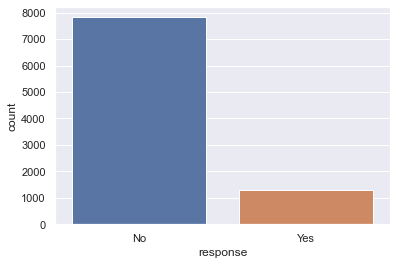

In [73]:
sns.countplot(x='response', data=marketing_customers)
#sns.barplot(x=marketing_customers.response.value_counts().index, y=marketing_customers.response.value_counts())

In [74]:
marketing_customers.sales_channel.value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [75]:
## group response rate by sales channel

# count the yes responses in each channel and devide by total responses in each channel
marketing_customers['response_positive'] = marketing_customers['response']=='Yes'
marketing_customers['response_valid'] = marketing_customers['response'].isin(['Yes','No'])


<AxesSubplot:xlabel='sales_channel', ylabel='response_rates'>

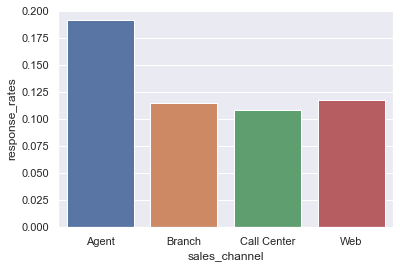

In [76]:
response_rates_by_sales_channel = marketing_customers.groupby("sales_channel")["response_positive"].sum()/marketing_customers.groupby("sales_channel")["response_valid"].sum()
response_rates_by_sales_channel = pd.DataFrame(response_rates_by_sales_channel, columns=['response_rates'])
response_rates_by_sales_channel
sns.barplot(x=response_rates_by_sales_channel.index, y=response_rates_by_sales_channel.response_rates)

In [77]:
response_rates_by_state = marketing_customers.groupby("state")["response_positive"].sum()/marketing_customers.groupby("state")["response_valid"].sum()
response_rates_by_state = pd.DataFrame(response_rates_by_state, columns=['response_rates'])


In [78]:
response_rates_by_num_of_policies = marketing_customers.groupby("number_of_policies")["response_positive"].sum()/marketing_customers.groupby("number_of_policies")["response_valid"].sum()
response_rates_by_num_of_policies = pd.DataFrame(response_rates_by_num_of_policies, columns=['response_rates'])
response_rates_by_num_of_policies


,response_rates
number_of_policies,
1,0.158720
2,0.149085
3,0.113014
4,0.102689
5,0.147420
6,0.112903
7,0.138568
8,0.109375
9,0.173077


In [79]:
print(marketing_customers.groupby("number_of_policies")["total_claim_amount"].mean())
print(marketing_customers.groupby("number_of_policies")["total_claim_amount"].median())

#marketing_customers.effective_to_date.value_counts()

number_of_policies
1    440.278532
2    433.610653
3    415.969821
4    428.791219
5    428.755107
6    410.962617
7    468.401546
8    445.049999
9    424.499642
Name: total_claim_amount, dtype: float64
number_of_policies
1    384.000000
2    393.600000
3    373.497423
4    364.800000
5    369.600000
6    353.970473
7    398.400000
8    393.600000
9    368.415441
Name: total_claim_amount, dtype: float64


In [80]:
marketing_customers['total_claim_amount_100q_bins'] =  pd.qcut(marketing_customers['total_claim_amount'], 50)
display(marketing_customers[['total_claim_amount','total_claim_amount_100q_bins']])

,total_claim_amount,total_claim_amount_100q_bins
0,384.811147,"(383.945, 398.4]"
1,1131.464935,"(1027.0, 1272.508]"
2,566.472247,"(556.8, 571.2]"
3,529.881344,"(528.0, 542.4]"
4,138.130879,"(123.512, 144.758]"
...,...,...
9129,198.234764,"(189.905, 212.799]"
9130,379.200000,"(369.6, 383.945]"
9131,790.784983,"(773.434, 834.059]"
9132,691.200000,"(678.49, 725.871]"


<AxesSubplot:xlabel='total_claim_amount_100q_bins', ylabel='response_rates'>

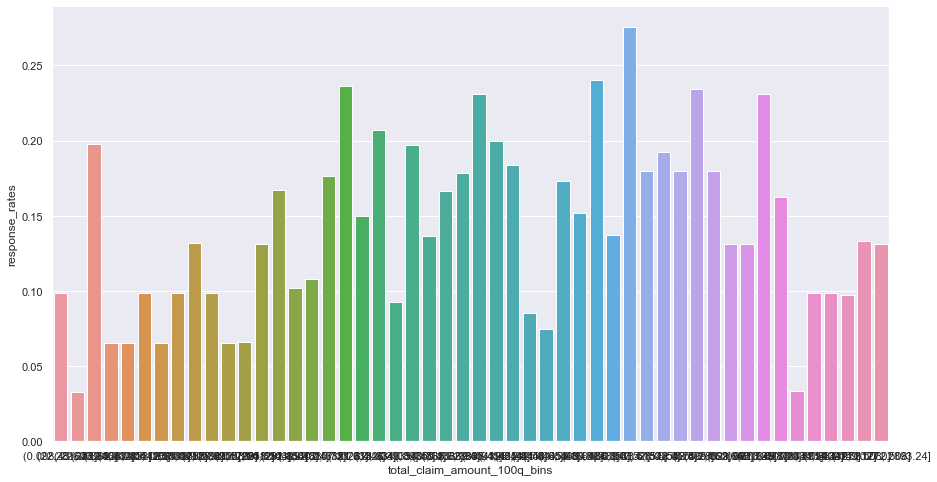

In [110]:
response_rates_by_claim_bins = marketing_customers.groupby("total_claim_amount_100q_bins")["response_positive"].sum()/marketing_customers.groupby("total_claim_amount_100q_bins")["response_valid"].sum()
response_rates_by_claim_bins = pd.DataFrame(response_rates_by_claim_bins, columns=['response_rates'])

sns.barplot(x=response_rates_by_claim_bins.index, y=response_rates_by_claim_bins.response_rates)

,total_claim_amount,total_claim_amount_10q_bins
0,384.811147,"(383.945, 453.6]"
1,1131.464935,"(773.434, 2893.24]"
2,566.472247,"(513.6, 599.062]"
3,529.881344,"(513.6, 599.062]"
4,138.130879,"(104.085, 212.799]"
...,...,...
9129,198.234764,"(104.085, 212.799]"
9130,379.200000,"(334.039, 383.945]"
9131,790.784983,"(773.434, 2893.24]"
9132,691.200000,"(599.062, 773.434]"


<AxesSubplot:xlabel='total_claim_amount_10q_bins', ylabel='response_rates'>

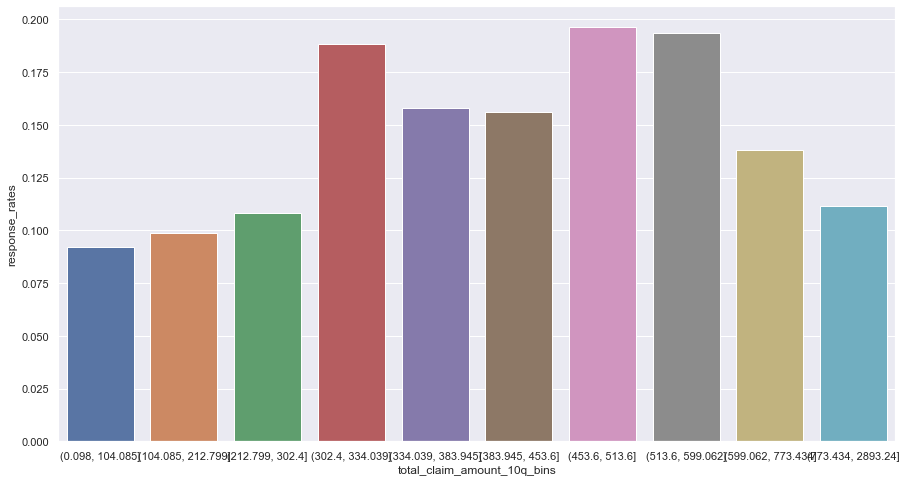

In [82]:
marketing_customers['total_claim_amount_10q_bins'] =  pd.qcut(marketing_customers['total_claim_amount'], 10)
display(marketing_customers[['total_claim_amount','total_claim_amount_10q_bins']])

response_rates_by_claim_bins = marketing_customers.groupby("total_claim_amount_10q_bins")["response_positive"].sum()/marketing_customers.groupby("total_claim_amount_10q_bins")["response_valid"].sum()
response_rates_by_claim_bins = pd.DataFrame(response_rates_by_claim_bins, columns=['response_rates'])

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=response_rates_by_claim_bins.index, y=response_rates_by_claim_bins.response_rates)

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

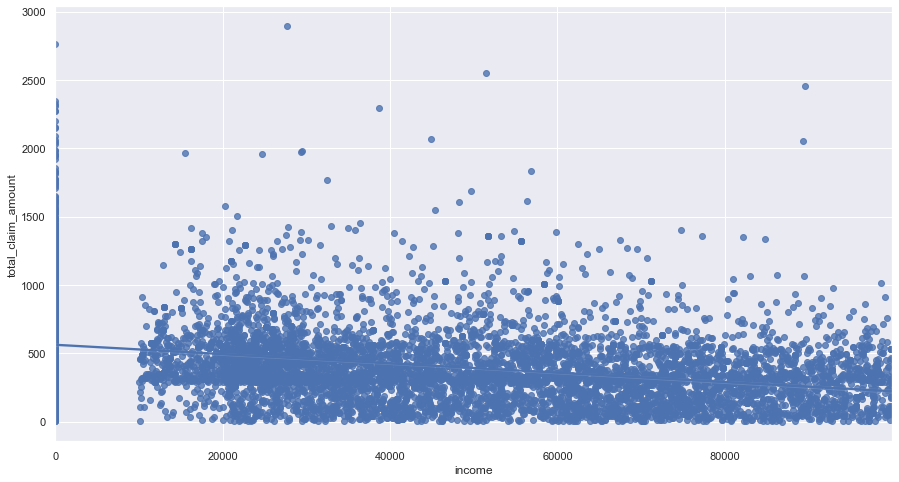

In [83]:
# playing with scatter plot
#sns.scatterplot(x=marketing_customers.income, y=marketing_customers.total_claim_amount)
sns.regplot(x="income", y="total_claim_amount", data=marketing_customers)

<AxesSubplot:xlabel='income_10q_bins', ylabel='response_rates'>

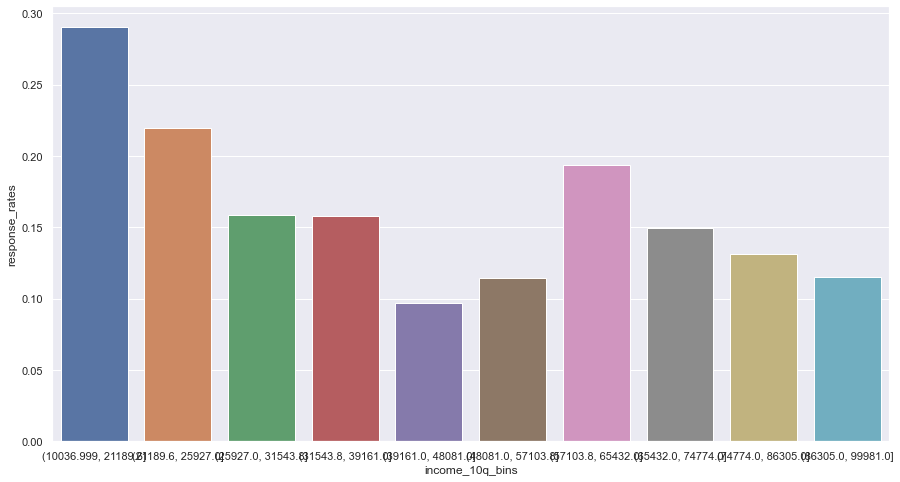

In [84]:
marketing_customers_with_income = marketing_customers[marketing_customers.income > 0]
marketing_customers_with_income['income_10q_bins'] =  pd.qcut(marketing_customers_with_income['income'], 10)

response_rates_by_income_bins = marketing_customers_with_income.groupby("income_10q_bins")["response_positive"].sum()/marketing_customers_with_income.groupby("income_10q_bins")["response_valid"].sum()
response_rates_by_income_bins = pd.DataFrame(response_rates_by_income_bins, columns=['response_rates'])

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=response_rates_by_income_bins.index, y=response_rates_by_income_bins.response_rates)

<AxesSubplot:xlabel='sales_channel', ylabel='Probability'>

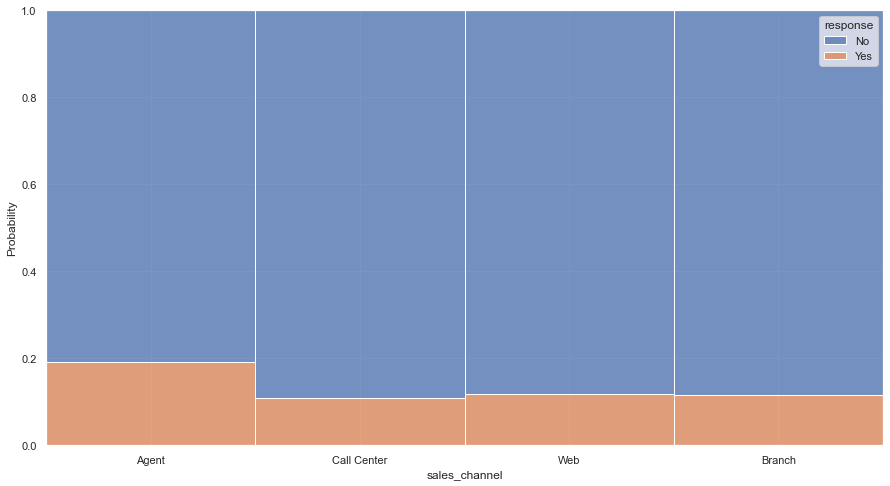

In [85]:
 sns.histplot(data=marketing_customers, x='sales_channel', hue='response', stat='probability', multiple="fill")

## Customer Analysis Round 4

In [86]:
# import using marketing customer analysis.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#fresh_customers = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
#fresh_customers = 

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [87]:
numericals = marketing_customers.select_dtypes(include=np.number)
categoricals = marketing_customers.select_dtypes(include=object)
print("----- marketing_customers.dtypes -----")
print(marketing_customers.dtypes)
print()
print("----- numericals.dtypes -----")
print(numericals.dtypes)
print()
print("----- categoricals.dtypes -----")
print(categoricals.dtypes)

----- marketing_customers.dtypes -----
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
s

##### Use seaborn library to construct distribution plots for the numerical variables

In [88]:
numericals.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Count'>

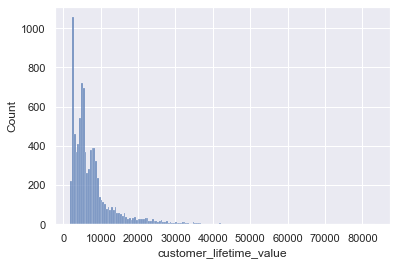

In [89]:
sns.histplot(data=numericals, x='customer_lifetime_value')

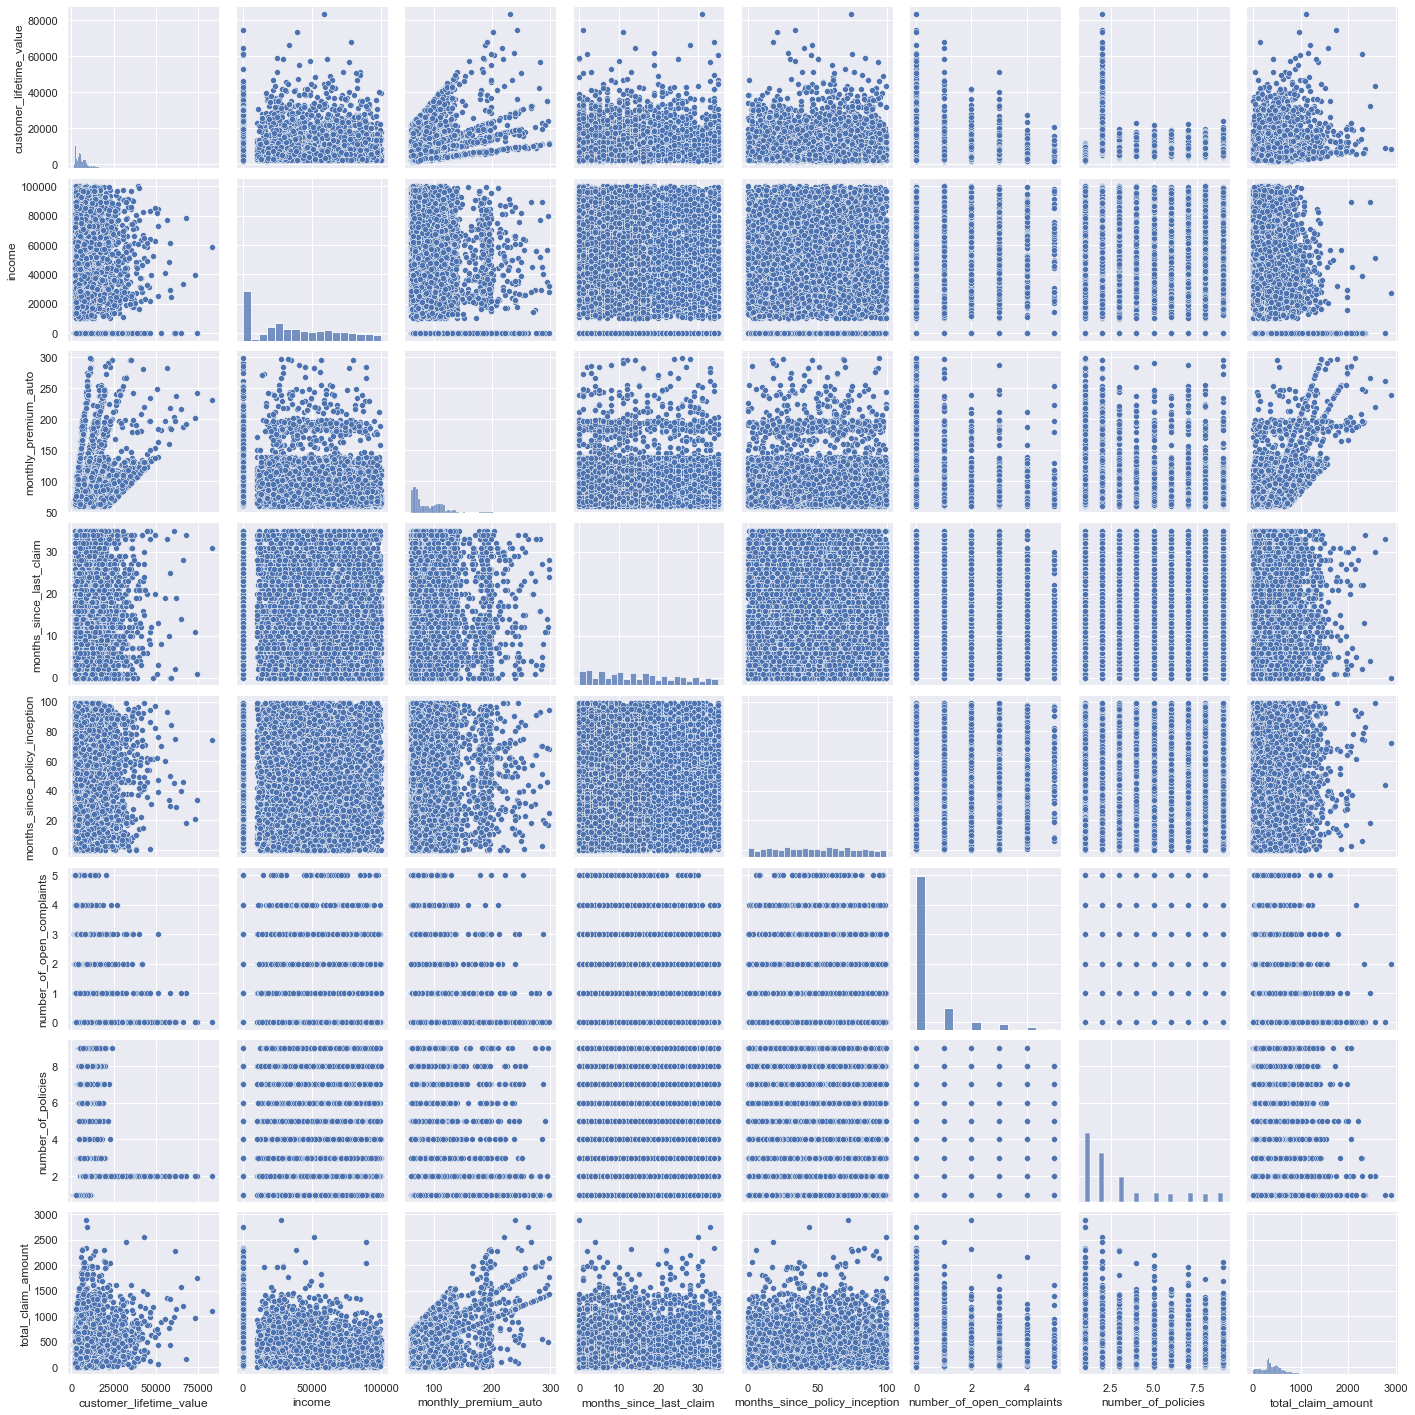

In [90]:
sns.pairplot(numericals)
#histograms shown in diagonal

##### Use Matplotlib to construct histograms

customer_lifetime_value


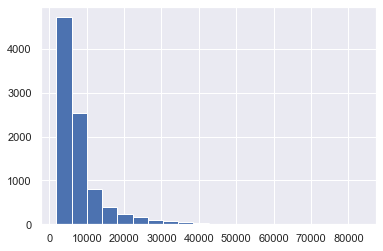

income


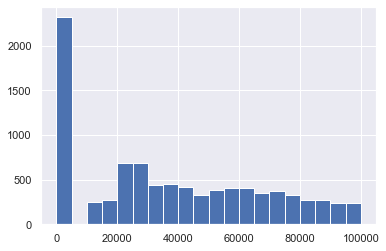

monthly_premium_auto


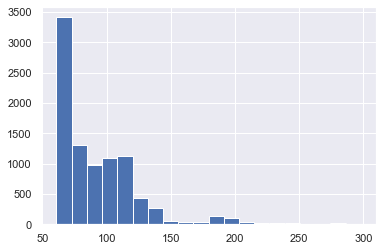

months_since_last_claim


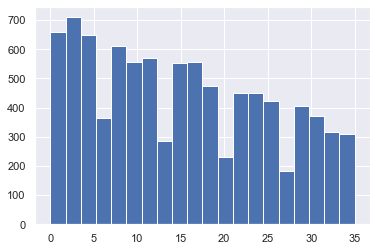

months_since_policy_inception


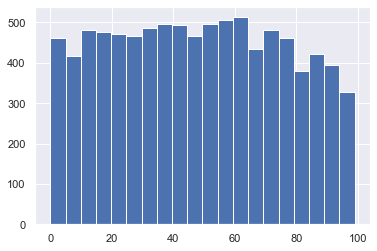

number_of_open_complaints


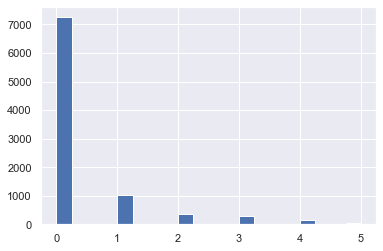

number_of_policies


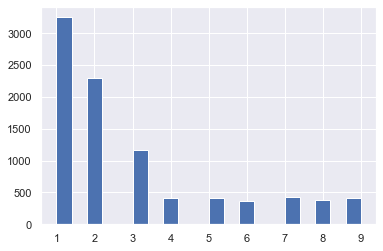

total_claim_amount


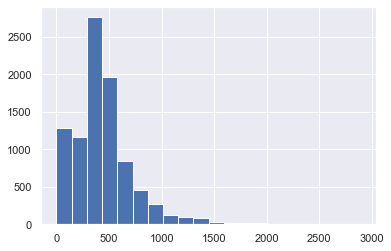

In [91]:
for col in numericals.columns:
    print(col)
    numericals[col].hist(bins=20)
    plt.show()

##### Do the distributions for different numerical variables look like a normal distribution

No, none of the charts look like a normal distribution as they are not symetrical, and don't taper at both ends.

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [94]:
y = numericals['total_claim_amount']
X = numericals.drop(['total_claim_amount'], axis=1)
lm = linear_model.LinearRegression()
lm.fit(X,y)
print(lm.score(X,y))
y_pred = lm.predict(X)
print(mean_squared_error(y_pred,y))

0.5186628226558787
40615.74326224916


In [95]:
numericals.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


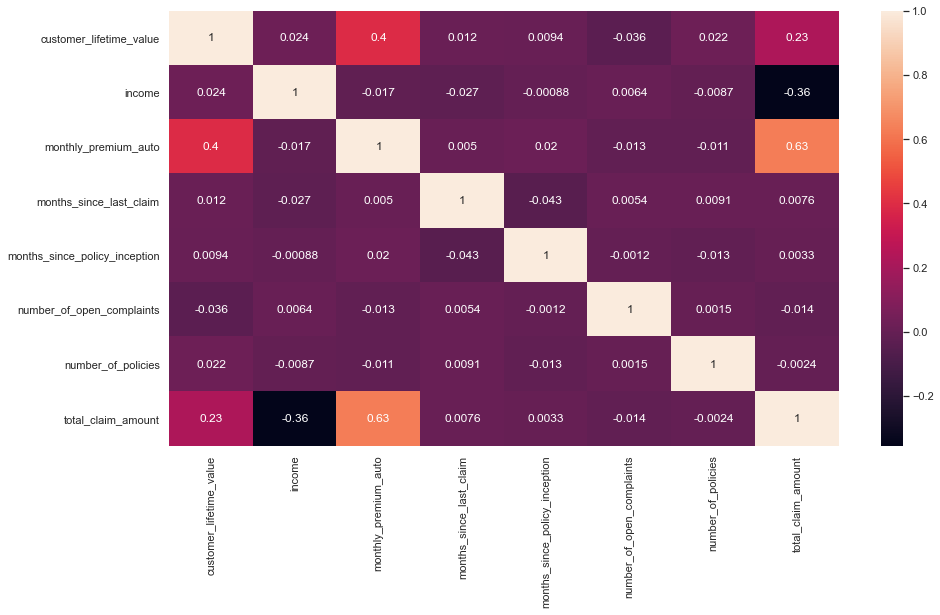

In [97]:
sns.set(rc = {'figure.figsize':(15,8)})
correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

For Total Claim Amount:
Fairly reasonable positive correlation with Monthly Premium Auto 
Some positive correlation with Customer Lifetime Value
Some negative correlation with Income
The rest of our numericals have almost zero correlation with Total Claim Amount

Out of our features:
There is some correlation between Customer Lifetime Value and Monthly Premium Auto though not so strong that we should exclude either.

### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

None of the features share a high correlation so not dropping any

## Customer Analysis Round 5

### X-y split.

In [98]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

y = numericals['total_claim_amount']
#X = numericals.drop(['Total Claim Amount'], axis=1)
X = numericals[['customer_lifetime_value','income','monthly_premium_auto']]

### Normalize

In [106]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
minmaxscaled = pd.DataFrame(x_normalized, columns=X.columns)
minmaxscaled

(9134, 3)


,customer_lifetime_value,income,monthly_premium_auto
0,0.010629,0.562847,0.033755
1,0.062406,0.000000,0.139241
2,0.134960,0.487763,0.198312
3,0.070589,0.000000,0.189873
4,0.011245,0.438443,0.050633
...,...,...,...
9129,0.264137,0.719547,0.050633
9130,0.014719,0.216081,0.075949
9131,0.076951,0.000000,0.101266
9132,0.069098,0.219452,0.147679


customer_lifetime_value


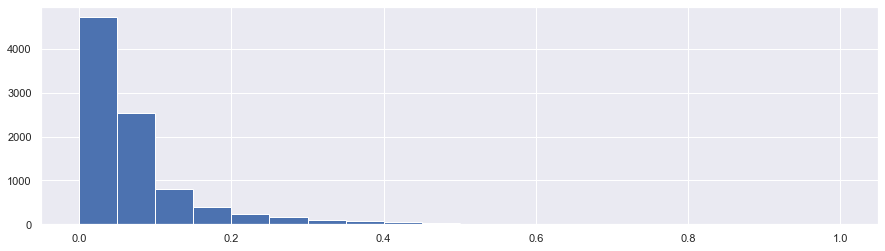

income


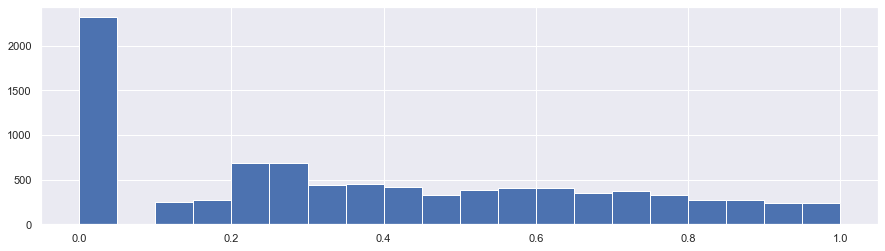

monthly_premium_auto


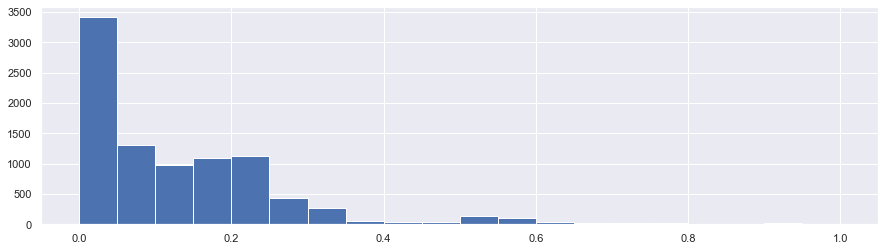

In [113]:
sns.set(rc = {'figure.figsize':(15,4)})

for col in minmaxscaled.columns:
    print(col)
    minmaxscaled[col].hist(bins=20)
    plt.show()

# taking a closer look at income chart without the 0 values.   
# minmaxscaled2 = minmaxscaled[minmaxscaled['income']>0]

# for col in minmaxscaled2.columns:
#     print(col)
#     minmaxscaled2[col].hist(bins=20)
#     plt.show()
